In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager

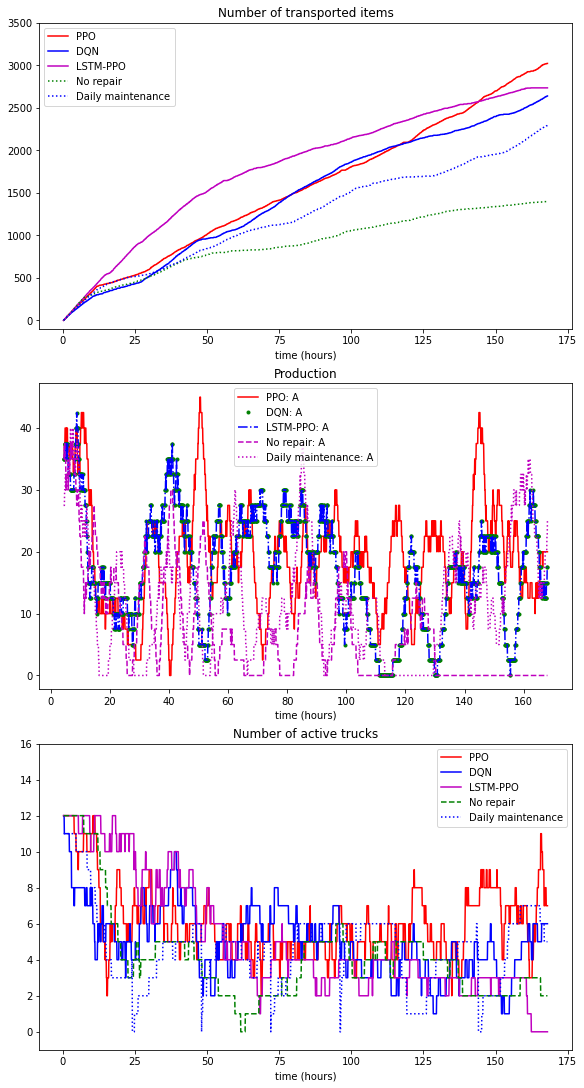

In [117]:
folder = 'result/12lorry_capacity-0.5_broken-3.0_mdp-1.0/'
baseline = pd.read_csv('result/baseline-repair-3days/result.csv')
daily = pd.read_csv('result/daily-repair-3days_maintain-4hours/result.csv')
ppo = pd.read_csv('result/PPO-repair-3days_maintain-4hours/result.csv')
dqn = pd.read_csv('result/RL-DQN_single/result.csv')
# lstm_ppo = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours/result.csv')
lstm_ppo = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours_density-1/result.csv')


average_periods = 50
daily_rate = daily.diff(periods=average_periods)
baseline_rate = baseline.diff(periods=average_periods)
ppo_rate = ppo.diff(periods=average_periods)
dqn_rate = dqn.diff(periods=average_periods)
lstm_ppo_rate = dqn.diff(periods=average_periods)

fig, axs = plt.subplots(3,1, figsize=(8,15), constrained_layout=True)

axs[0].plot(ppo['time'].values, (ppo['A']+ppo['P12']+ppo['B']+ppo['P23']).values,'-',color='r', label='PPO')
axs[0].plot(dqn['time'].values, (dqn['A']+dqn['P12']+dqn['B']+dqn['P23']).values,'b-', label='DQN')
axs[0].plot(lstm_ppo['time'].values, (lstm_ppo['A']+lstm_ppo['P12']+lstm_ppo['B']+lstm_ppo['P23']).values,'m-', label='LSTM-PPO')
axs[0].plot(baseline['time'].values, (baseline['A']+baseline['P12']+baseline['B']+baseline['P23']).values,'g:',label='No repair')
axs[0].plot(daily['time'].values, (daily['A']+daily['P12']+daily['B']+daily['P23']).values,'b:',label='Daily maintenance')
axs[0].set_xlabel('time (hours)')
axs[0].set_ylim([-100,3500])
axs[0].set_title('Number of transported items')
axs[0].legend()


axs[1].plot(ppo['time'].values, ppo_rate['A'].values,'r-', label='PPO: A')
# axs[1].plot(ppo['time'].values, ppo_rate['B'].values,'g-', label='PPO: B')
axs[1].plot(dqn['time'].values, dqn_rate['A'].values,'g.', label='DQN: A')
# axs[1].plot(dqn['time'].values, dqn_rate['B'].values,'g.', label='DQN: B')
axs[1].plot(lstm_ppo['time'].values, lstm_ppo_rate['A'].values,'b-.', label='LSTM-PPO: A')
# axs[1].plot(lstm_ppo['time'].values, lstm_ppo_rate['B'].values,'g-.', label='LSTM-PPO: B')
axs[1].plot(baseline['time'].values, baseline_rate['A'].values,'m--', label='No repair: A')
# axs[1].plot(baseline['time'].values, baseline_rate['B'].values,'g--', label='No repair: B')
axs[1].plot(daily['time'].values, daily_rate['A'].values,'m:', label='Daily maintenance: A')
# axs[1].plot(daily['time'].values, daily_rate['B'].values,'b:', label='Daily maintenance: B')
axs[1].set_xlabel('time (hours)')
axs[1].set_title('Production')
axs[1].legend()

axs[2].plot(ppo['time'].values,ppo['current_lorry'].values, 'r-', label='PPO')
axs[2].plot(dqn['time'].values,dqn['current_lorry'].values, 'b-', label='DQN')
axs[2].plot(lstm_ppo['time'].values,lstm_ppo['current_lorry'].values, 'm-', label='LSTM-PPO')
axs[2].plot(baseline['time'].values,baseline['current_lorry'].values, 'g--', label='No repair')
axs[2].plot(daily['time'].values,daily['current_lorry'].values, 'b:', label='Daily maintenance')
axs[2].set_xlabel('time (hours)')
axs[2].set_title('Number of active trucks')
axs[2].set_ylim([-1,16])
axs[2].legend()


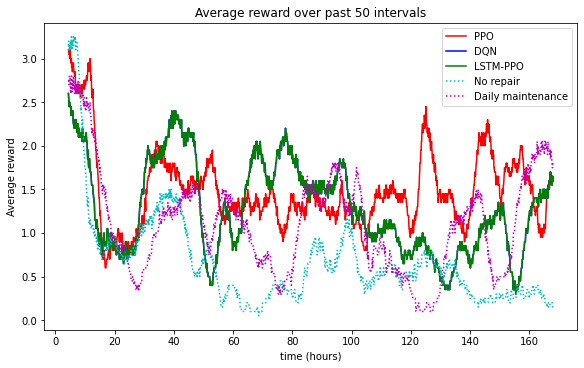

In [4]:
fig, axs = plt.subplots(1,1, figsize=(8,5), constrained_layout=True)

axs.plot(ppo['time'].values, (ppo_rate['A']+ppo_rate['P12']+ppo_rate['B']+ppo_rate['P23']).values / 50,'r-', label='PPO')
axs.plot(dqn['time'].values, (dqn_rate['A']+dqn_rate['P12']+dqn_rate['B']+dqn_rate['P23']).values / 50,'b-', label='DQN')
axs.plot(lstm_ppo['time'].values, (lstm_ppo_rate['A']+lstm_ppo_rate['P12']+lstm_ppo_rate['B']+lstm_ppo_rate['P23']).values / 50,'g-', label='LSTM-PPO')
axs.plot(baseline['time'].values, (baseline_rate['A']+baseline_rate['P12']+baseline_rate['B']+baseline_rate['P23']).values / 50,'c:',label='No repair')
axs.plot(daily['time'].values, (daily_rate['A']+daily_rate['P12']+daily_rate['B']+daily_rate['P23']).values / 50,'m:',label='Daily maintenance')
axs.set_xlabel('time (hours)')
axs.set_ylabel('Average reward')
# axs[0].set_ylim([-100,3500])
axs.set_title('Average reward over past 50 intervals')
axs.legend()


### Impact of maintenance duration, repair = 3 days

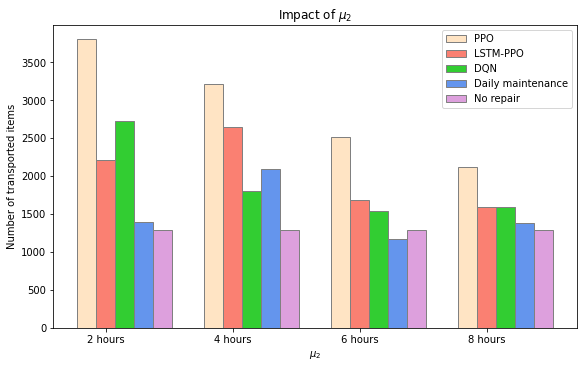

In [112]:
ppo_m_2 = pd.read_csv('result/PPO-repair-3days_maintain-2hours/reward.csv').iloc[-1]['cumulate reward']
ppo_m_4 = pd.read_csv('result/PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
ppo_m_6 = pd.read_csv('result/PPO-repair-3days_maintain-6hours/reward.csv').iloc[-1]['cumulate reward']
ppo_m_8 = pd.read_csv('result/PPO-repair-3days_maintain-8hours/reward.csv').iloc[-1]['cumulate reward']
dqn_m_2 = pd.read_csv('result/DQN-repair-3days_maintain-2hours/reward.csv').iloc[-1]['cumulate reward']
dqn_m_4 = pd.read_csv('result/DQN-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
dqn_m_6 = pd.read_csv('result/DQN-repair-3days_maintain-6hours/reward.csv').iloc[-1]['cumulate reward']
dqn_m_8 = pd.read_csv('result/DQN-repair-3days_maintain-8hours/reward.csv').iloc[-1]['cumulate reward']
baseline = pd.read_csv('result/baseline-repair-3days/reward.csv').iloc[-1]['cumulate reward']
daily_m_2 = pd.read_csv('result/daily-repair-3days_maintain-2hours/reward.csv').iloc[-1]['cumulate reward']
daily_m_4 = pd.read_csv('result/daily-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
daily_m_6 = pd.read_csv('result/daily-repair-3days_maintain-6hours/reward.csv').iloc[-1]['cumulate reward']
daily_m_8 = pd.read_csv('result/daily-repair-3days_maintain-8hours/reward.csv').iloc[-1]['cumulate reward']
lstm_m_2 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-2hours/reward.csv').iloc[-1]['cumulate reward']
lstm_m_4 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
lstm_m_6 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-6hours/reward.csv').iloc[-1]['cumulate reward']
lstm_m_8 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-8hours/reward.csv').iloc[-1]['cumulate reward']

barWidth = 0.15
ppo_bar_mu2 = [ppo_m_2, ppo_m_4, ppo_m_6, ppo_m_8]
dqn_bar_mu2 = [dqn_m_2, dqn_m_4, dqn_m_6, dqn_m_8]
daily_bar_mu2 = [daily_m_2, daily_m_4, daily_m_6, daily_m_8]
baseline_bar_mu2 = [baseline, baseline, baseline, baseline]
lstm_bar_mu2 = [lstm_m_2, lstm_m_4, lstm_m_6, lstm_m_8]

br1 = np.arange(len(ppo_bar_mu2))
br2 = np.array([i + barWidth for i in br1])
br3 = np.array([i + barWidth for i in br2])
br4 = np.array([i + barWidth for i in br3])
br5 = np.array([i + barWidth for i in br4])

fig, axs = plt.subplots(1,1, figsize=(8,5), constrained_layout=True)

plt.bar(br1, ppo_bar_mu2, color = 'bisque', width=barWidth, edgecolor ='grey', label = 'PPO')
plt.bar(br2, lstm_bar_mu2, color = 'salmon', width=barWidth, edgecolor ='grey', label = 'LSTM-PPO')
plt.bar(br3, dqn_bar_mu2, color = 'limegreen', width=barWidth, edgecolor ='grey', label = 'DQN')
plt.bar(br4, daily_bar_mu2, color = 'cornflowerblue', width=barWidth, edgecolor ='grey', label = 'Daily maintenance')
plt.bar(br5, baseline_bar_mu2, color = 'plum', width=barWidth, edgecolor ='grey', label = 'No repair')

plt.xlabel(r'$\mu_2$')
plt.ylabel('Number of transported items')
plt.title(r'Impact of $\mu_2$')
plt.xticks([i+barWidth for i in range(len(ppo_bar_mu2))], ['2 hours','4 hours','6 hours','8 hours'])
plt.legend()


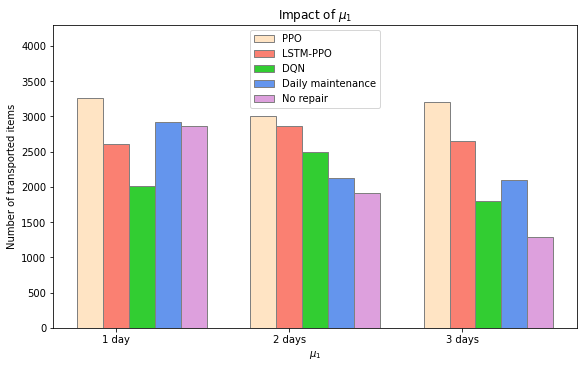

In [113]:
ppo_r_1 = pd.read_csv('result/PPO-repair-1days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
ppo_r_2 = pd.read_csv('result/PPO-repair-2days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
ppo_r_3 = pd.read_csv('result/PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']

dqn_r_1 = pd.read_csv('result/DQN-repair-1days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
dqn_r_2 = pd.read_csv('result/DQN-repair-2days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
dqn_r_3 = pd.read_csv('result/DQN-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']

daily_r_1 = pd.read_csv('result/daily-repair-1days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
daily_r_2 = pd.read_csv('result/daily-repair-2days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
daily_r_3 = pd.read_csv('result/daily-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']

baseline_r_1 = pd.read_csv('result/baseline-repair-1days/reward.csv').iloc[-1]['cumulate reward']
baseline_r_2 = pd.read_csv('result/baseline-repair-2days/reward.csv').iloc[-1]['cumulate reward']
baseline_r_3 = pd.read_csv('result/baseline-repair-3days/reward.csv').iloc[-1]['cumulate reward']

lstm_r_1 = pd.read_csv('result/LSTM_PPO-repair-1days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
lstm_r_2 = pd.read_csv('result/LSTM_PPO-repair-2days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
lstm_r_3 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']


barWidth = 0.15
ppo_bar_mu1 = [ppo_r_1, ppo_r_2, ppo_r_3]
dqn_bar_mu1 = [dqn_r_1, dqn_r_2, dqn_r_3]
daily_bar_mu1 = [daily_r_1, daily_r_2, daily_r_3]
baseline_bar_mu1 = [baseline_r_1, baseline_r_2, baseline_r_3]
lstm_bar_mu1 = [lstm_r_1,lstm_r_2,lstm_r_3]

br1 = np.arange(len(ppo_bar_mu1))
br2 = np.array([i + barWidth for i in br1])
br3 = np.array([i + barWidth for i in br2])
br4 = np.array([i + barWidth for i in br3])
br5 = np.array([i + barWidth for i in br4])

fig, axs = plt.subplots(1,1, figsize=(8,5), constrained_layout=True)
plt.bar(br1, ppo_bar_mu1, color = 'bisque', width=barWidth, edgecolor ='grey', label = 'PPO')
plt.bar(br2, lstm_bar_mu1, color = 'salmon', width=barWidth, edgecolor ='grey', label = 'LSTM-PPO')
plt.bar(br3, dqn_bar_mu1, color = 'limegreen', width=barWidth, edgecolor ='grey', label = 'DQN')
plt.bar(br4, daily_bar_mu1, color = 'cornflowerblue', width=barWidth, edgecolor ='grey', label = 'Daily maintenance')
plt.bar(br5, baseline_bar_mu1, color = 'plum', width=barWidth, edgecolor ='grey', label = 'No repair')

plt.xlabel(r'$\mu_1$')
plt.ylabel('Number of transported items')
plt.ylim([0,4300])
plt.title(r'Impact of $\mu_1$')
plt.xticks([i+barWidth for i in range(len(ppo_bar_mu1))], ['1 day','2 days','3 days'])
plt.legend()


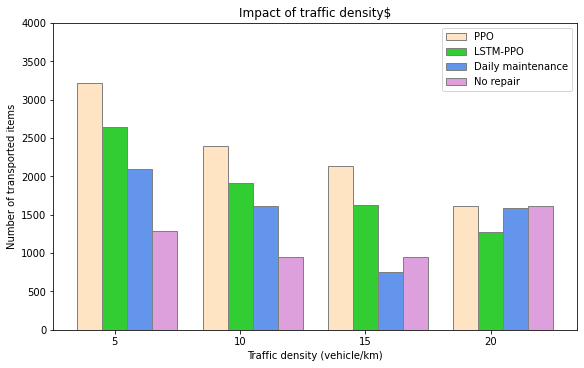

In [114]:
ppo_d_1 = pd.read_csv('result/PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
ppo_d_2 = pd.read_csv('result/PPO-repair-3days_maintain-4hours_density-2/reward.csv').iloc[-1]['cumulate reward']
ppo_d_3 = pd.read_csv('result/PPO-repair-3days_maintain-4hours_density-3/reward.csv').iloc[-1]['cumulate reward']
ppo_d_4 = pd.read_csv('result/PPO-repair-3days_maintain-4hours_density-4/reward.csv').iloc[-1]['cumulate reward']

daily_d_1 = pd.read_csv('result/daily-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
daily_d_2 = pd.read_csv('result/daily-repair-3days_maintain-4hours_density-2/reward.csv').iloc[-1]['cumulate reward']
daily_d_3 = pd.read_csv('result/daily-repair-3days_maintain-4hours_density-3/reward.csv').iloc[-1]['cumulate reward']
daily_d_4 = pd.read_csv('result/daily-repair-3days_maintain-4hours_density-4/reward.csv').iloc[-1]['cumulate reward']

baseline_d_1 = pd.read_csv('result/baseline-repair-3days/reward.csv').iloc[-1]['cumulate reward']
baseline_d_2 = pd.read_csv('result/baseline-repair-3days_density-2/reward.csv').iloc[-1]['cumulate reward']
baseline_d_3 = pd.read_csv('result/baseline-repair-3days_density-2/reward.csv').iloc[-1]['cumulate reward']
baseline_d_4 = pd.read_csv('result/PPO-repair-3days_maintain-4hours_density-4/reward.csv').iloc[-1]['cumulate reward']

lstm_d_1 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours/reward.csv').iloc[-1]['cumulate reward']
lstm_d_2 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours_density-2/reward.csv').iloc[-1]['cumulate reward']
lstm_d_3 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours_density-3/reward.csv').iloc[-1]['cumulate reward']
lstm_d_4 = pd.read_csv('result/LSTM_PPO-repair-3days_maintain-4hours_density-4/reward.csv').iloc[-1]['cumulate reward']

barWidth = 0.2
ppo_bar_d = [ppo_d_1, ppo_d_2, ppo_d_3, ppo_d_4]
daily_bar_d = [daily_d_1, daily_d_2, daily_d_3, daily_d_4]
baseline_bar_d = [baseline_d_1, baseline_d_2, baseline_d_3, baseline_d_4]
lstm_bar_d = [lstm_d_1, lstm_d_2, lstm_d_3, lstm_d_4]

# plt.rcParams["font.family"] = "Verdana"

br1 = np.arange(len(ppo_bar_d))
br2 = np.array([i + barWidth for i in br1])
br3 = np.array([i + barWidth for i in br2])
br4 = np.array([i + barWidth for i in br3])

fig, axs = plt.subplots(1,1, figsize=(8,5), constrained_layout=True)
plt.bar(br1, ppo_bar_d, color = 'bisque', width=barWidth, edgecolor ='grey', label = 'PPO')
plt.bar(br2, lstm_bar_d, color = 'limegreen', width=barWidth, edgecolor ='grey', label = 'LSTM-PPO')
plt.bar(br3, daily_bar_d, color = 'cornflowerblue', width=barWidth, edgecolor ='grey', label = 'Daily maintenance')
plt.bar(br4, baseline_bar_d, color = 'plum', width=barWidth, edgecolor ='grey', label = 'No repair')

plt.xlabel('Traffic density (vehicle/km)')
plt.ylabel('Number of transported items')
plt.ylim([0,4000])
plt.title(r'Impact of traffic density$')
plt.xticks([i+barWidth for i in range(len(ppo_bar_d))], ['5','10','15','20'])
plt.legend()